## Exercise 2.5

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
def update_estimate_average(action, actions, rewards):
    assert len(actions) == len(rewards)
    q = 0
    counts = 0
    for i in range(len(actions)):
        if action == actions[i]:
            q += rewards[i]
            counts += 1
    return q / counts

In [221]:
def update_estimate_incremental(q, r, step_size):
    return q + step_size * (r - q)

In [222]:
def run_average(k, q, num_runs, num_steps, threshold):
    avg_actions = np.zeros(num_steps)
    avg_rewards = np.zeros(num_steps)
    avg_estimates = np.zeros(k)
    for _ in range(num_runs):
        actions = np.zeros(num_steps, dtype=np.int32)
        rewards = np.zeros(num_steps)
        estimates = np.zeros(k)
        for i in range(num_steps):
            e = np.random.uniform()
            q_ = [qi + np.random.normal(0, 0.01) for qi in q]
            action = np.argmax(estimates) if e > threshold else int(np.random.uniform(0, k))
            reward = q_[action]
            actions[i] = action
            rewards[i] = reward
            estimates[action] = update_estimate_average(action, actions, rewards)
            avg_actions[i] += action / num_runs
            avg_rewards[i] += reward / num_runs
        avg_estimates += estimates / num_runs
    return avg_actions, avg_rewards, avg_estimates

In [223]:
def run_incremental(k, q, num_runs, num_steps, threshold, step_size=lambda i: (1/(1+i))):
    avg_actions = np.zeros(num_steps)
    avg_rewards = np.zeros(num_steps)
    avg_estimates = np.zeros(num_steps)
    for _ in range(num_runs):
        estimates = np.zeros(k)
        for i in range(num_steps):
            e = np.random.uniform()
            q_ = [qi + np.random.normal(0, 0.01) for qi in q]
            action = np.argmax(estimates) if e > threshold else int(np.random.uniform(0, k))
            reward = q_[action]
            alpha = step_size(i)
            estimates[action] = update_estimate_incremental(estimates[action], reward, alpha)
            avg_actions[i] += action / num_runs
            avg_rewards[i] += reward / num_runs
            avg_estimates[action] += estimates[action] / num_runs
    return avg_actions, avg_rewards

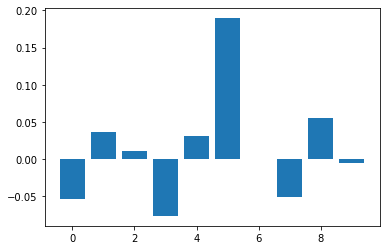

In [224]:
num_steps = 1000
num_runs = 200
k = 10
q = [0 + np.random.normal(0, 0.1) for _ in range(k)]

x = list(range(len(q)))
y = q
plt.bar(x, y)
plt.show()

In [227]:
avg_actions, avg_rewards, estimates = run_average(k, q, num_runs, num_steps, threshold=0.1)

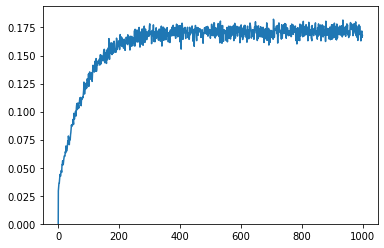

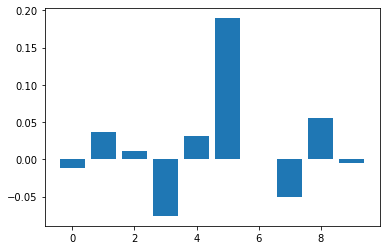

In [228]:
x = list(range(len(avg_rewards)))
y = avg_rewards
plt.plot(x, y)
plt.ylim(bottom=0)
plt.show()

x = list(range(len(estimates)))
y = estimates
plt.bar(x, y)
plt.show()